In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load all the datasets
test_data = pd.read_csv('./datasets/test_data.csv')
train_data = pd.read_csv('./datasets/train_data.csv')
validation_data = pd.read_csv('./datasets/validation_data.csv')

train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace = True)

print(test_data.head())

    Invoice ID Branch      City Customer type  Gender         Product line  \
0  109-86-4363      B  Mandalay        Member  Female    Sports and travel   
1  695-28-6250      A    Yangon        Normal  Female    Sports and travel   
2  420-18-8989      A    Yangon        Member  Female    Sports and travel   
3  877-22-3308      A    Yangon        Member    Male    Health and beauty   
4  549-03-9315      B  Mandalay        Normal    Male  Fashion accessories   

   Unit price  Quantity  Tax 5%    Total       Date   Time      Payment  \
0       60.08         7  21.028  441.588  2/14/2019  11:36  Credit card   
1       43.06         5  10.765  226.065   2/4/2019  16:38      Ewallet   
2       51.52         8  20.608  432.768   2/2/2019  15:47         Cash   
3       15.87        10   7.935  166.635  3/13/2019  16:40         Cash   
4       94.87         8  37.948  796.908  2/12/2019  12:58      Ewallet   

     cogs  gross margin percentage  gross income  Rating  
0  420.56            

In [3]:
# 1. A forecast of daily sales with a confidence interval, indicating the reliability of the forecasts.
daily_sales = train_data.groupby('Date').agg(Mean = ('Total', 'mean'), Total = ('Total', 'sum'))
daily_sales.reset_index(inplace = True)
daily_sales.rename(columns = {'index': 'Date'}, inplace = True)

print(daily_sales.head())

        Date      Mean      Total
0 2019-01-01  375.4800  2628.3600
1 2019-01-02  295.8970   887.6910
2 2019-01-03  300.5121  1502.5605
3 2019-01-04  295.4931  1477.4655
4 2019-01-05  317.4225  2221.9575


In [4]:
# 2. A forecast of monthly sales with a confidence interval, indicating the reliability of the forecasts.
# On the train_data, group by Date, aggregate all the daily records to monthly records i.e. 1/12019 and 1/10/2019 to January 2019
# And then aggregate the Total for having a mean and sum of all monthly's records
monthly_sales = train_data.groupby(pd.Grouper(freq = 'ME')).agg(Mean = ('Total', 'mean'), Total = ('Total', 'sum'))
monthly_sales.index = monthly_sales.index.strftime('%B %Y')
monthly_sales.reset_index(inplace = True)
monthly_sales.rename(columns = {'index': 'Date'}, inplace = True)

print(monthly_sales.head())

            Date        Mean       Total
0   January 2019  322.647617  67433.3520
1  February 2019  321.094234  59723.5275
2     March 2019  319.768793  65552.6025


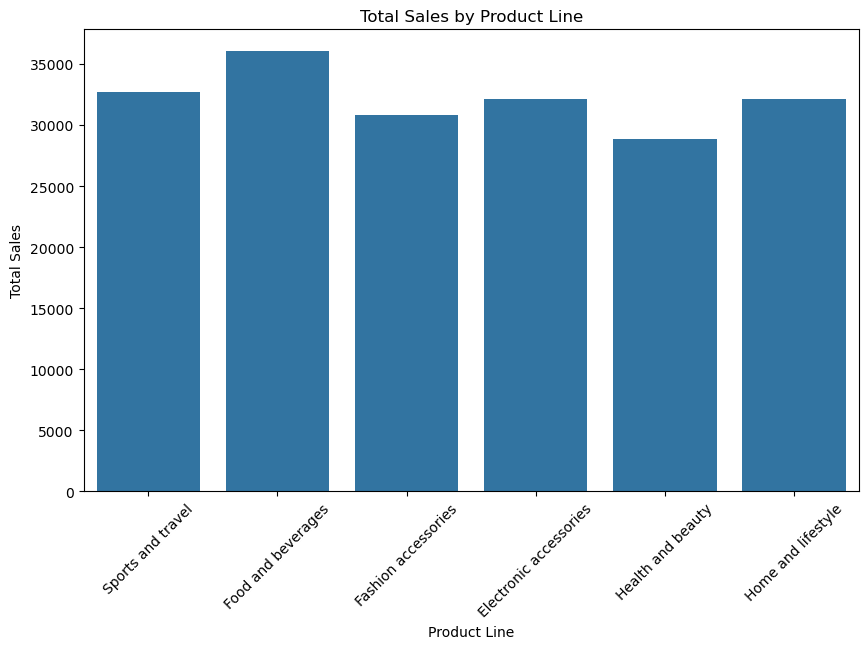

In [11]:
# 3. Average Total Sales by Product Line
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Product line', y = 'Total', data = train_data, estimator = np.sum, errorbar = None)
plt.title('Total Sales by Product Line')
plt.xticks(rotation = 45)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

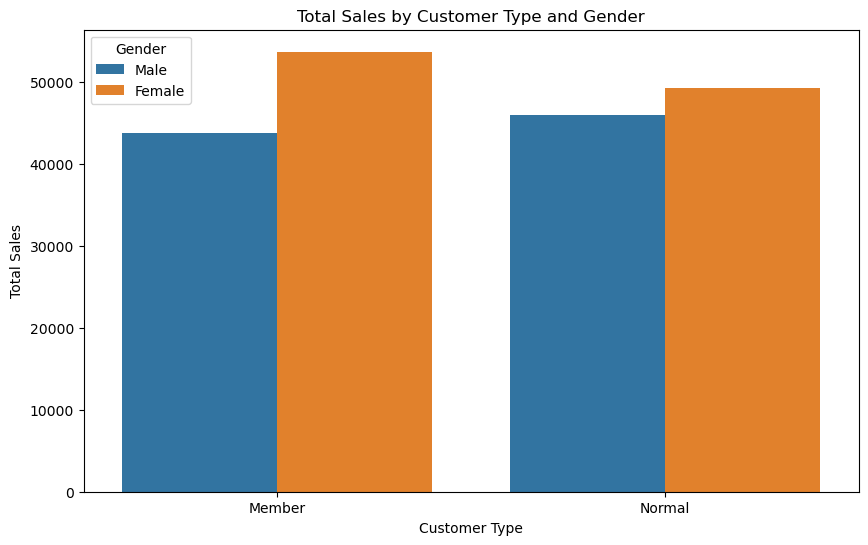

In [14]:
# 4. Average Total Sales by Customer Type and Gender
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Customer type', y = 'Total', hue = 'Gender', data = train_data, estimator = np.sum, errorbar = None)
plt.title('Total Sales by Customer Type and Gender')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

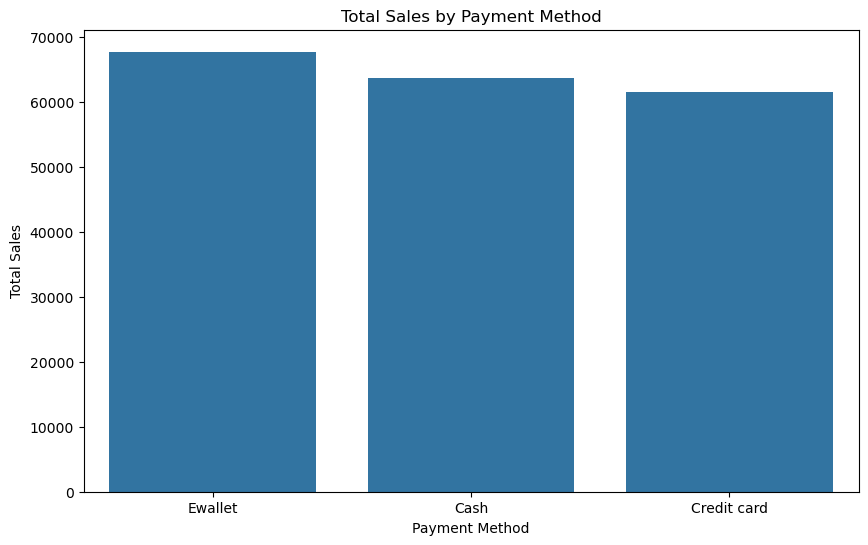

In [21]:
# 5. Average Total Sales by Payment Method
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Payment', y = 'Total', data = train_data, estimator = np.sum, errorbar = None)
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()

In [6]:
# 3. Insights into the primary factors driving sales trends.

# Variable Importance: A ranked list of features based on their influence on sales, such as promotional activities, seasonality, product categories, and external factors like economic indicators.
# Trend Analysis: Identification of key sales trends over time, including seasonality effects, growth or decline in different product lines, and the impact of marketing campaigns.
# Causal Relationships: Insights into causal relationships between sales and influencing factors, using techniques like correlation analysis or more advanced causal inference methods.
# Customer Behavior Insights: Understanding of how different customer segments contribute to sales trends, which may involve analyzing customer demographics, purchase history, and preferences.

In [7]:
# 4. Recommendations for strategic actions based on the forecasted sales data.

# Inventory Management: Recommendations on stock levels for different product categories to meet forecasted demand without overstocking or stockouts.
# Marketing and Promotions: Suggestions for timing and targeting of marketing campaigns and promotions based on forecasted sales peaks and customer segment behaviors.
# Product Strategy: Advice on potential areas for product development or discontinuation, informed by the product performance trends and forecasted demand.
# Pricing Strategy: Insights into how pricing adjustments could be leveraged to maximize sales and profits, considering historical sales data and market demand forecasts.
# Resource Allocation: Guidelines for allocating resources efficiently across stores or regions, marketing channels, and product development efforts based on the expected return on investment.
# Risk Management: Strategies for mitigating risks associated with uncertainties in sales forecasts, including contingency planning for unexpected market changes or demand fluctuations.